In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
!pip install transforms3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for transforms3d: filename=transforms3d-0.4.1-py3-none-any.whl size=1376758 sha256=86cacca78b82ef9929307191fcab3b2af6eafd3f512933665c1495232142b4fb
  Stored in directory: /root/.cache/pip/wheels/06/37/d0/6e0fe02010be074e8138f2b5ffff5254b74751aafb60bb5666
Successfully built transforms3d


In [6]:
import transforms3d as tf

[[ 1.         0.         0.        -0.0748903]
 [ 0.         1.         0.         0.0184772]
 [ 0.         0.         1.         0.120209 ]
 [ 0.         0.         0.         1.       ]]
[[ 1.         0.         0.         0.0748903]
 [ 0.         1.         0.        -0.0184772]
 [ 0.         0.         1.        -0.120209 ]
 [ 0.         0.         0.         1.       ]]


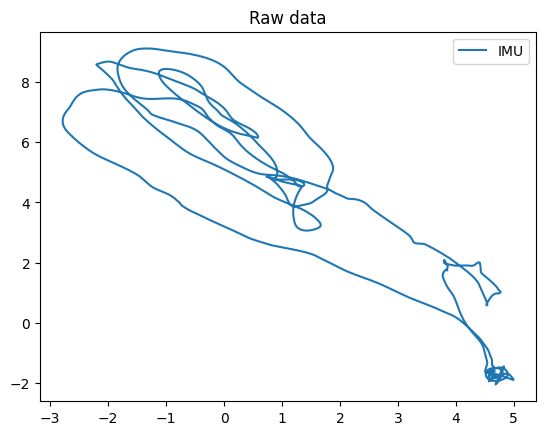

In [25]:

pathInBodyAxis = pd.read_csv("mav0/state_groundtruth_estimate0/data.csv")

################### Pose Cam0 to Body #####################
T = [ 7.48903e-02, -1.84772e-02, -1.20209e-01] # translations
R = [[1.0, 0.0, 0.0],
     [0.0, 1.0, 0.0],
     [0.0, 0.0, 1.0]] # rotation matrix
Z = [1.0, 1.0, 1.0] # zooms

poseCam0toBody = tf.affines.compose(T, R, Z)
###########################################################
################## Pose Body to Cam0 ######################
poseBodytoCam0 = np.linalg.inv(poseCam0toBody)

print(poseBodytoCam0)
print(poseCam0toBody)

pathInBodyAxis["#timestamp"] = pathInBodyAxis["#timestamp"] * 1e-9

plt.plot(pathInBodyAxis[" p_RS_R_x [m]"], pathInBodyAxis[" p_RS_R_y [m]"], label="IMU")
plt.legend()
plt.title("Raw data")
plt.show()

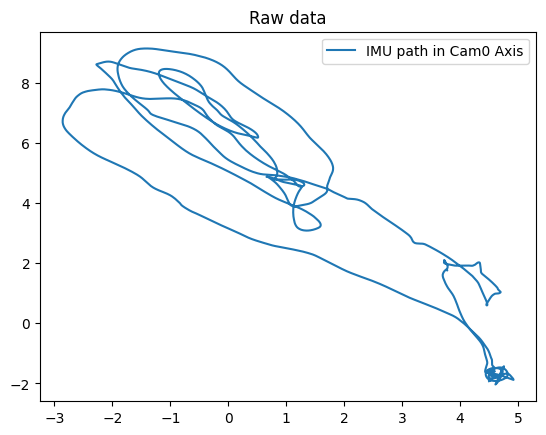

In [26]:
#Ejercicio a: El camino de body dado por la imu pero en el sistema de coordenadas de la camara0

bodyXinCam0X = []
bodyYinCam0Y = []
bodyZinCam0Z = []

for (bodyX, bodyY, bodyZ) in zip(pathInBodyAxis[" p_RS_R_x [m]"],pathInBodyAxis[" p_RS_R_y [m]"], pathInBodyAxis[" p_RS_R_z [m]"]):
  cam0Coor = np.matmul(poseBodytoCam0, [bodyX, bodyY, bodyZ,1])
  bodyXinCam0X[:0] = [cam0Coor[0]]
  bodyYinCam0Y[:0] = [cam0Coor[1]]

plt.plot(bodyXinCam0X, bodyYinCam0Y, label="IMU path in Cam0 Axis")
plt.legend()
plt.title("Raw data")
plt.show()

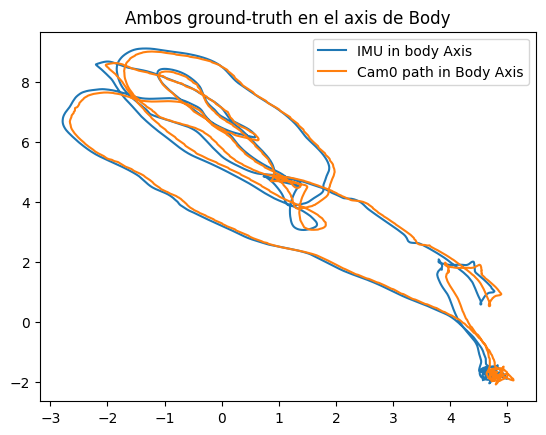

In [28]:
#Ejercicio c: El camino de body dado por la imu es el ground-truth original, por lo tanto grafico ese en coordenadas del body y tambien grafico el de la camara 0 transformado al de body
pathInCamAxis = pd.read_csv("mav0/leica0/data.csv")

plt.plot(pathInBodyAxis[" p_RS_R_x [m]"], pathInBodyAxis[" p_RS_R_y [m]"], label="IMU in body Axis")
plt.legend()
plt.title("Ambos ground-truth en el axis de Body")

cam0XinBodyX = []
cam0YinBodyY = []
cam0ZinBodyZ = []

for (camX, camY, camZ) in zip(pathInCamAxis["p_RS_R_x [m]"],pathInCamAxis["p_RS_R_y [m]"], pathInCamAxis["p_RS_R_z [m]"]):
  bodyCoor = np.matmul(poseCam0toBody, [camX, camY, camZ,1])
  cam0XinBodyX[:0] = [bodyCoor[0]]
  cam0YinBodyY[:0] = [bodyCoor[1]]

plt.plot(cam0XinBodyX, cam0YinBodyY, label="Cam0 path in Body Axis")
plt.legend()
plt.show()